In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data= pd.read_csv("framingham.csv")

In [3]:
data.head(100)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,65,3.0,0,0.0,0.0,0,0,0,193.0,123.0,76.5,29.33,60.0,96.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
98,0,56,1.0,0,0.0,0.0,0,1,0,296.0,180.0,90.0,23.72,75.0,120.0,0


In [4]:
import seaborn as sns

<Axes: xlabel='TenYearCHD', ylabel='count'>

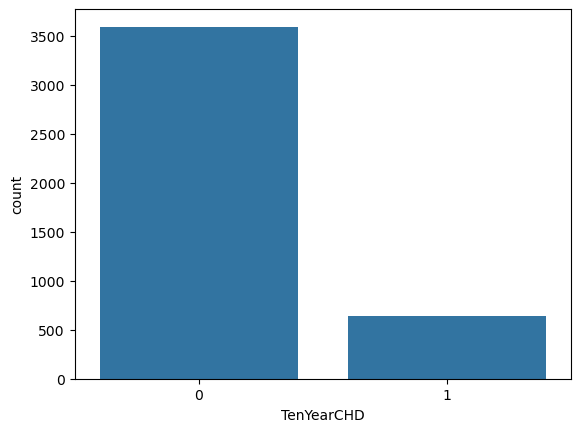

In [5]:
sns.countplot(x="TenYearCHD",data=data)

In [6]:
data.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

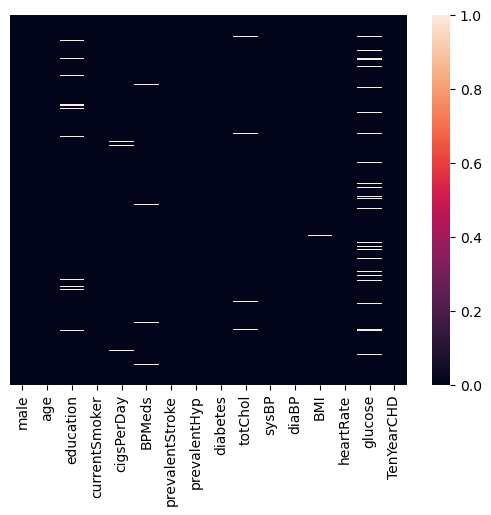

In [8]:
ax=sns.heatmap(data.isnull(),yticklabels=False)

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
X= data.drop('TenYearCHD',axis=1)
y= data["TenYearCHD"]

In [12]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [13]:
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
logmodel=LogisticRegression()

In [17]:
logmodel.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
predictions=logmodel.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.91       923\n           1       0.50      0.03      0.06       174\n\n    accuracy                           0.84      1097\n   macro avg       0.67      0.51      0.49      1097\nweighted avg       0.79      0.84      0.78      1097\n'

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,predictions)

0.8413855970829535